## Principal Component Analysis

Principal Component Analysis is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

In [15]:
#Importing the necessary libraries

import pandas as pd
import seaborn as sns

In [3]:
#Reading Dataset

data=pd.read_csv('Iris.csv')

In [4]:
#Checking the first five rows

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Dropping the unnecessary column ID

data=data.drop('Id',axis=1)

In [6]:
#Splitting the dependent and independent variables

X=data.iloc[:,:-1]
Y=data['Species']
print("Shape of X is ",X.shape)
print("Shape of Y is ",Y.shape)

Shape of X is  (150, 4)
Shape of Y is  (150,)


In [7]:
#Spiltting dataset into train and tests

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0 )
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (120, 4)
Shape of X_test is  (30, 4)
Shape of Y_train is  (120,)
Shape of Y_test is  (30,)


## Standardization

Standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms.

In [8]:
#Standardization

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train_sc)
x_test_pca = pca.transform(X_test_sc)

In [13]:
#This result the variance explained by the number of components taken into account

pca.explained_variance_ratio_.cumsum()

array([0.72226528, 0.96201323, 0.9953944 , 1.        ])

In [14]:
x_train_pca

array([[ 1.27228206e+00,  3.57878727e-01,  1.80336960e-01,
        -2.18683823e-01],
       [ 1.52231770e-01, -2.99835283e-01,  6.57129626e-01,
        -2.49320747e-01],
       [-2.18764183e+00,  6.17154256e-01, -1.80887051e-01,
         3.66971080e-03],
       [ 9.41913396e-01,  1.21810481e-02,  3.29616253e-01,
        -1.23928051e-02],
       [ 1.76227837e+00, -2.71066387e-01,  3.36678920e-01,
         9.29947613e-02],
       [-8.16806401e-02, -1.04319475e+00,  5.24835677e-01,
        -2.98705715e-02],
       [-1.89794863e+00,  1.48464927e+00, -3.40792097e-01,
         5.29711669e-02],
       [ 9.59395493e-01, -6.91087802e-01,  9.92861246e-02,
        -1.91468714e-01],
       [ 3.65661204e-01, -9.13013087e-02,  2.01390351e-01,
         3.40875107e-02],
       [ 2.31845912e-01, -1.01891237e+00, -2.00913311e-01,
        -8.50013948e-03],
       [ 1.79730127e+00,  3.25092688e-01,  1.91532698e-02,
         1.34801794e-01],
       [-2.40350676e+00, -2.44874760e-01,  5.92229980e-02,
      

In [23]:
df=pd.DataFrame({'x_train_pca0':x_train_pca[:,0],'x_train_pca1':x_train_pca[:,1],'Species':Y_train})

In [24]:
df

,x_train_pca0,x_train_pca1,Species
137,1.272282,0.357879,Iris-virginica
84,0.152232,-0.299835,Iris-versicolor
27,-2.187642,0.617154,Iris-setosa
127,0.941913,0.012181,Iris-virginica
132,1.762278,-0.271066,Iris-virginica
...,...,...,...
9,-2.232890,-0.382580,Iris-setosa
103,1.350624,-0.117820,Iris-virginica
67,0.063099,-0.812311,Iris-versicolor
117,2.395400,2.450394,Iris-virginica


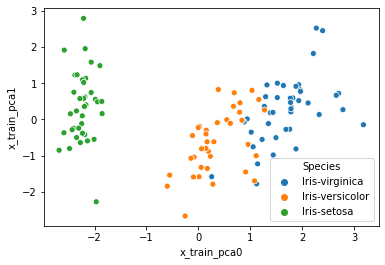

In [27]:
sns.scatterplot( df['x_train_pca0'], df['x_train_pca1'],hue=df['Species'])